# 🔊 Intensity, Loudness & Timbre - Part 1

     Youtube Video Ref - https://www.youtube.com/watch?v=Jkoysm1fHUw&list=PL-wATfeyAMNqIee7cH3q1bh4QJFAaeNv0&index=3&pp=iAQB

## Intensity & Loudness

This notebook covers:
- **Intensity**: Objective physical measure (W/m²)
- **Loudness**: Subjective perception (phons)
- **Equal Loudness Contours**: Frequency-dependent perception

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

---

## 1. ⚡ Sound Intensity

**Intensity** = Power per unit area (W/m²)

$$I = \frac{P}{A} \propto A^2$$

Key relationships:
- Intensity ∝ Amplitude²
- Inverse Square Law: $I = \frac{P}{4\pi r^2}$

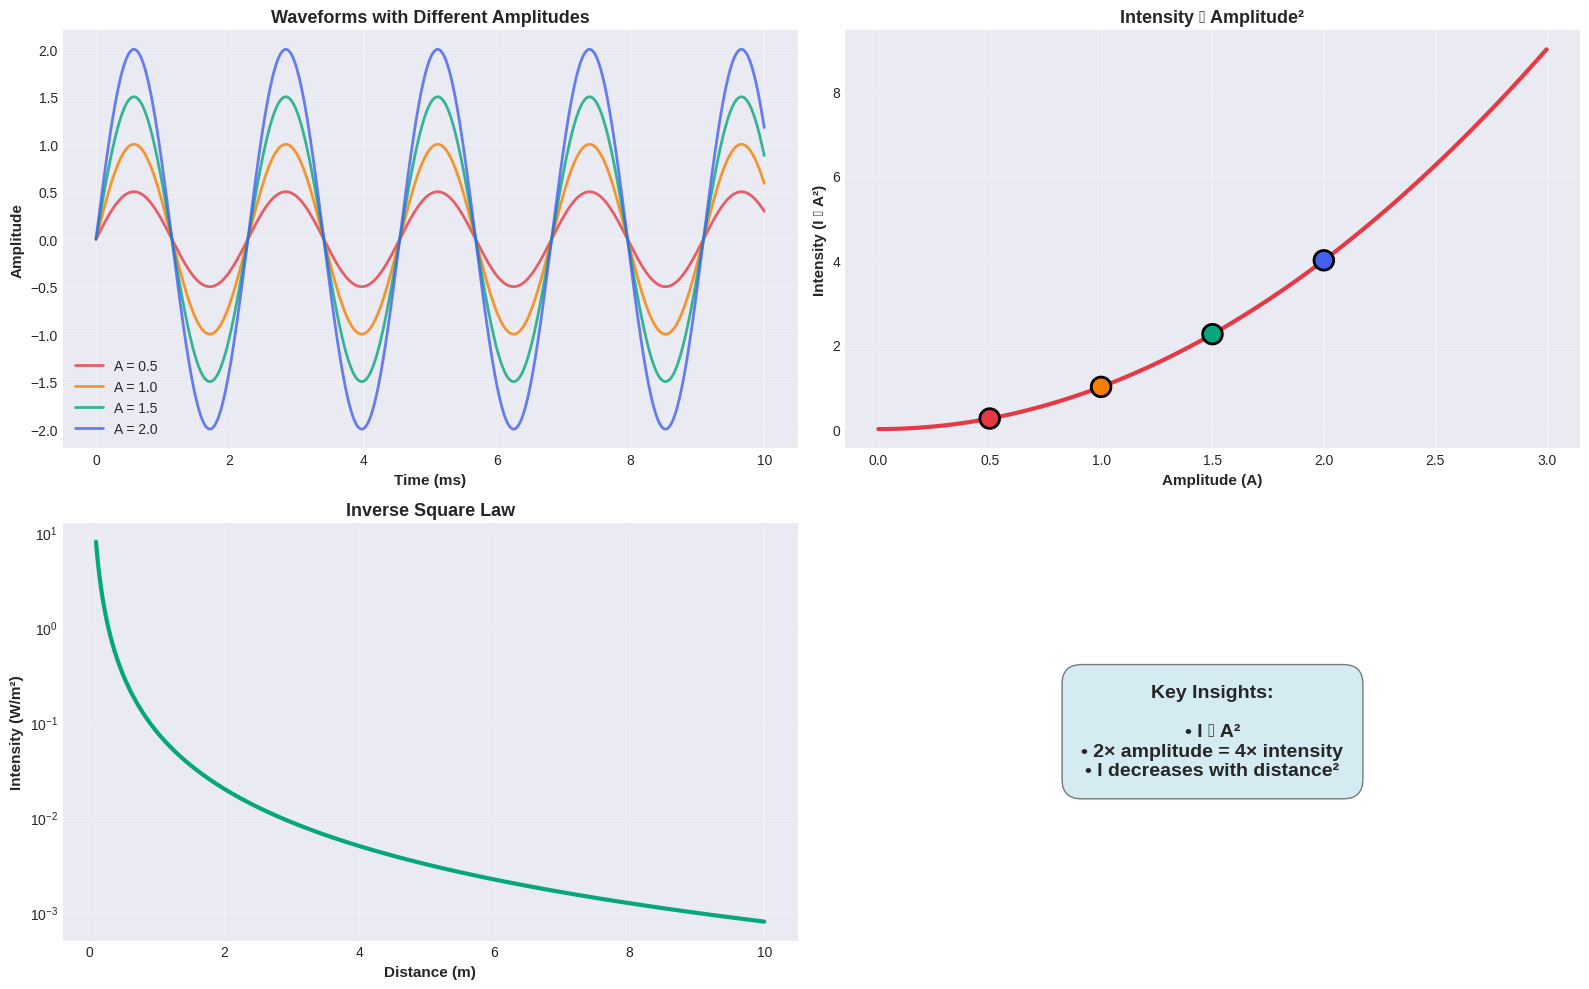

✓ Intensity is proportional to amplitude squared
✓ Intensity decreases with distance squared


In [2]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

t = np.linspace(0, 0.01, 1000)
f = 440
amplitudes = [0.5, 1.0, 1.5, 2.0]
colors = ['#E63946', '#F77F00', '#06A77D', '#4361EE']

# Waveforms
for A, color in zip(amplitudes, colors):
    y = A * np.sin(2 * np.pi * f * t)
    axes[0, 0].plot(t * 1000, y, linewidth=2, label=f'A = {A}', color=color, alpha=0.8)

axes[0, 0].set_xlabel('Time (ms)', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Amplitude', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Waveforms with Different Amplitudes', fontsize=13, fontweight='bold')
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(True, alpha=0.3)

# Amplitude vs Intensity
A_range = np.linspace(0, 3, 100)
I_range = A_range ** 2

axes[0, 1].plot(A_range, I_range, linewidth=3, color='#E63946')
axes[0, 1].scatter(amplitudes, np.array(amplitudes)**2, s=200, c=colors, 
                   edgecolors='black', linewidth=2, zorder=5)
axes[0, 1].set_xlabel('Amplitude (A)', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Intensity (I ∝ A²)', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Intensity ∝ Amplitude²', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Inverse Square Law
P = 1.0
distances = np.linspace(0.1, 10, 1000)
intensities = P / (4 * np.pi * distances**2)

axes[1, 0].plot(distances, intensities, linewidth=3, color='#06A77D')
axes[1, 0].set_xlabel('Distance (m)', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Intensity (W/m²)', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Inverse Square Law', fontsize=13, fontweight='bold')
axes[1, 0].set_yscale('log')
axes[1, 0].grid(True, alpha=0.3)

# Summary table
axes[1, 1].axis('off')
axes[1, 1].text(0.5, 0.5, 'Key Insights:\n\n• I ∝ A²\n• 2× amplitude = 4× intensity\n• I decreases with distance²',
               ha='center', va='center', fontsize=14, fontweight='bold',
               bbox=dict(boxstyle='round,pad=1', facecolor='lightblue', alpha=0.5))

plt.tight_layout()
plt.show()

print("✓ Intensity is proportional to amplitude squared")
print("✓ Intensity decreases with distance squared")

---

## 2. 👂 Decibels (dB)

**Threshold of Hearing**: $I_0 = 10^{-12}$ W/m²

**Decibel Formula**:
$$L = 10 \times \log_{10}\left(\frac{I}{I_0}\right) \text{ dB}$$

**Rule of Thumb**: 10× intensity = +10 dB

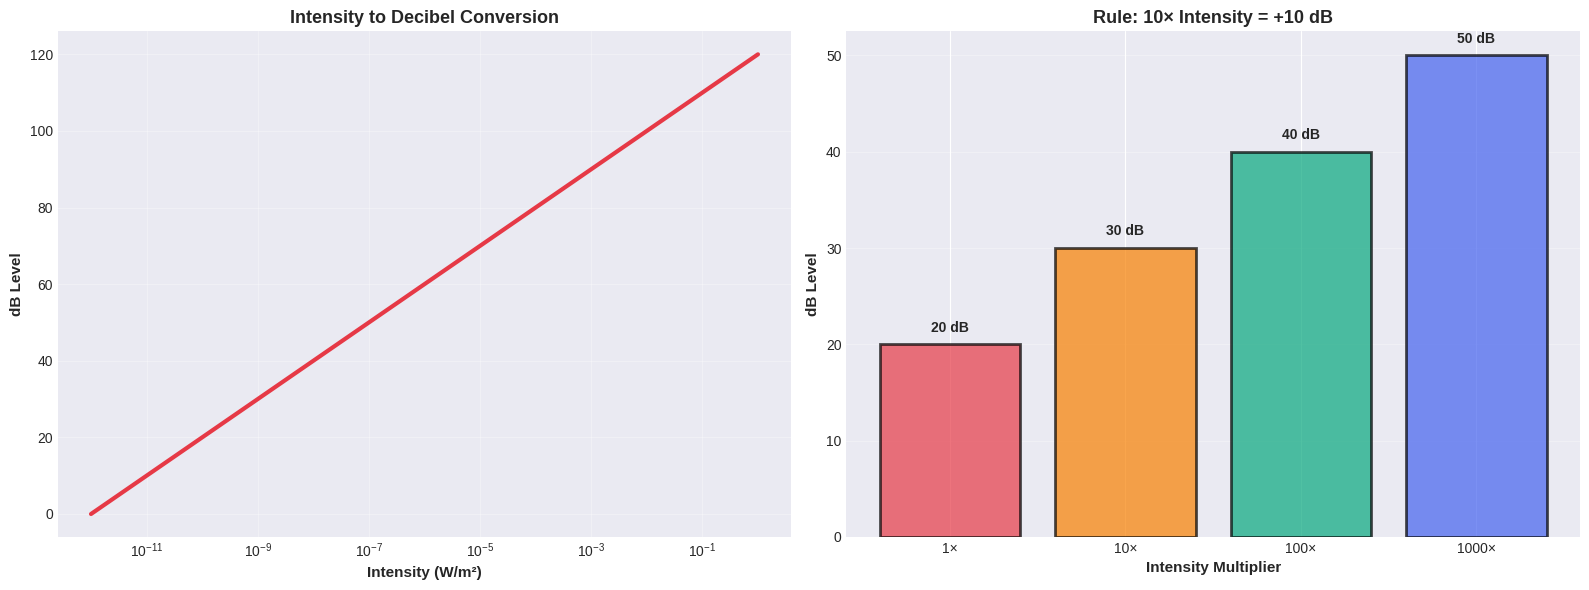


60 dB = 1.00e-06 W/m²
80 dB = 1.00e-04 W/m²
80 dB is 100× more intense than 60 dB


In [3]:
I0 = 1e-12

def intensity_to_db(I, I0=1e-12):
    return 10 * np.log10(I / I0)

def db_to_intensity(dB, I0=1e-12):
    return I0 * 10**(dB / 10)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Intensity to dB conversion
intensities = np.logspace(-12, 0, 1000)
dB_values = intensity_to_db(intensities)

axes[0].semilogx(intensities, dB_values, linewidth=3, color='#E63946')
axes[0].set_xlabel('Intensity (W/m²)', fontsize=11, fontweight='bold')
axes[0].set_ylabel('dB Level', fontsize=11, fontweight='bold')
axes[0].set_title('Intensity to Decibel Conversion', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Rule of thumb
base_intensity = 1e-10
multipliers = [1, 10, 100, 1000]
intensities_mult = [base_intensity * m for m in multipliers]
dB_mult = [intensity_to_db(I) for I in intensities_mult]
labels = ['1×', '10×', '100×', '1000×']

bars = axes[1].bar(labels, dB_mult, color=['#E63946', '#F77F00', '#06A77D', '#4361EE'],
                   alpha=0.7, edgecolor='black', linewidth=2)
axes[1].set_xlabel('Intensity Multiplier', fontsize=11, fontweight='bold')
axes[1].set_ylabel('dB Level', fontsize=11, fontweight='bold')
axes[1].set_title('Rule: 10× Intensity = +10 dB', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

for bar, dB in zip(bars, dB_mult):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{dB:.0f} dB', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n60 dB = {db_to_intensity(60):.2e} W/m²")
print(f"80 dB = {db_to_intensity(80):.2e} W/m²")
print(f"80 dB is {10**((80-60)/10):.0f}× more intense than 60 dB")

---

## 3. 📊 Real-World Sound Levels

| Source | dB | Intensity (W/m²) |
|--------|----|-----------------|
| Threshold of Hearing | 0 | 10⁻¹² |
| Whisper | 30 | 10⁻⁹ |
| Conversation | 60 | 10⁻⁶ |
| Vacuum | 70 | 10⁻⁵ |
| Loud Music | 100 | 10⁻² |
| Chainsaw | 110 | 10⁻¹ |
| Threshold of Pain | 130 | 10 |
| Jet Engine | 140 | 100 |

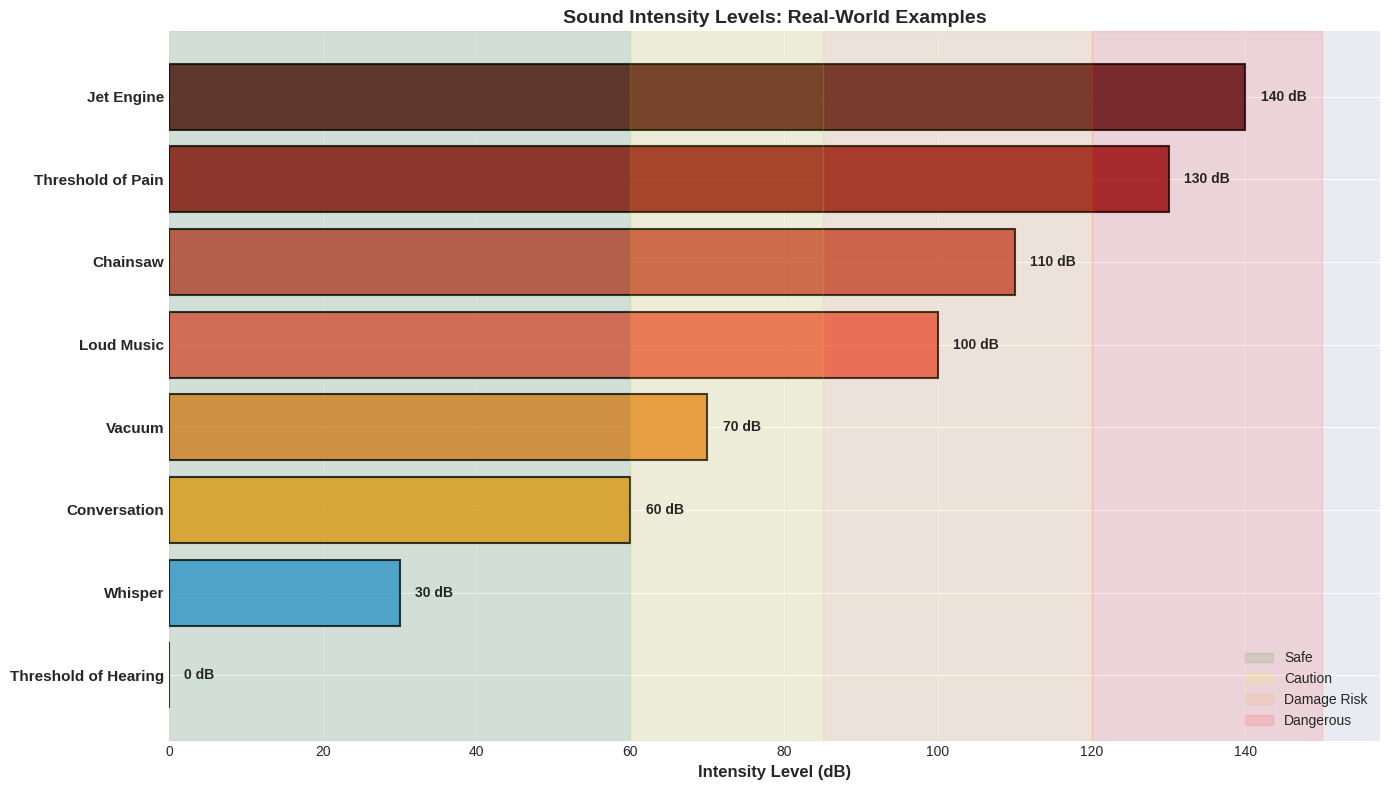


⚠️ Safety Guidelines:
  • 0-60 dB: Safe
  • 85 dB: 8 hours max exposure
  • 100 dB: 15 minutes max
  • 120+ dB: Painful/dangerous


In [4]:
sound_sources = [
    ('Threshold of Hearing', 0, '#2ECC71'),
    ('Whisper', 30, '#3498DB'),
    ('Conversation', 60, '#F39C12'),
    ('Vacuum', 70, '#E67E22'),
    ('Loud Music', 100, '#E74C3C'),
    ('Chainsaw', 110, '#C0392B'),
    ('Threshold of Pain', 130, '#8B0000'),
    ('Jet Engine', 140, '#4A0000'),
]

sources = [s[0] for s in sound_sources]
dB_levels = [s[1] for s in sound_sources]
colors = [s[2] for s in sound_sources]

fig, ax = plt.subplots(figsize=(14, 8))
y_pos = np.arange(len(sources))
bars = ax.barh(y_pos, dB_levels, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)

ax.set_yticks(y_pos)
ax.set_yticklabels(sources, fontsize=11, fontweight='bold')
ax.set_xlabel('Intensity Level (dB)', fontsize=12, fontweight='bold')
ax.set_title('Sound Intensity Levels: Real-World Examples', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')

# Add dB values
for bar, dB in zip(bars, dB_levels):
    width = bar.get_width()
    ax.text(width + 2, bar.get_y() + bar.get_height()/2, f'{dB} dB',
            ha='left', va='center', fontsize=10, fontweight='bold')

# Danger zones
ax.axvspan(0, 60, alpha=0.1, color='green', label='Safe')
ax.axvspan(60, 85, alpha=0.1, color='yellow', label='Caution')
ax.axvspan(85, 120, alpha=0.1, color='orange', label='Damage Risk')
ax.axvspan(120, 150, alpha=0.1, color='red', label='Dangerous')
ax.legend(loc='lower right', fontsize=10)

plt.tight_layout()
plt.show()

print("\n⚠️ Safety Guidelines:")
print("  • 0-60 dB: Safe")
print("  • 85 dB: 8 hours max exposure")
print("  • 100 dB: 15 minutes max")
print("  • 120+ dB: Painful/dangerous")

---

## 4. 🎧 Loudness (Subjective Perception)

**Loudness** = Subjective perception (measured in **phons**)

**Definition**: A sound has loudness N phons if it sounds as loud as a 1000 Hz tone at N dB SPL.

**Factors affecting loudness**:
1. Intensity (primary)
2. Frequency (2-5 kHz most sensitive)
3. Duration (<200 ms sounds quieter)
4. Spectral content
5. Individual differences (age, hearing damage)

---

## 5. 📈 Equal Loudness Contours

**Equal Loudness Contours** show the dB SPL required at different frequencies to produce the same perceived loudness.

**Key Observations**:
1. Low frequencies need more power at low volumes
2. Most sensitive at 2-5 kHz (speech range)
3. Contours flatten at high levels (>80 phons)
4. Explains why bass "disappears" at low volume

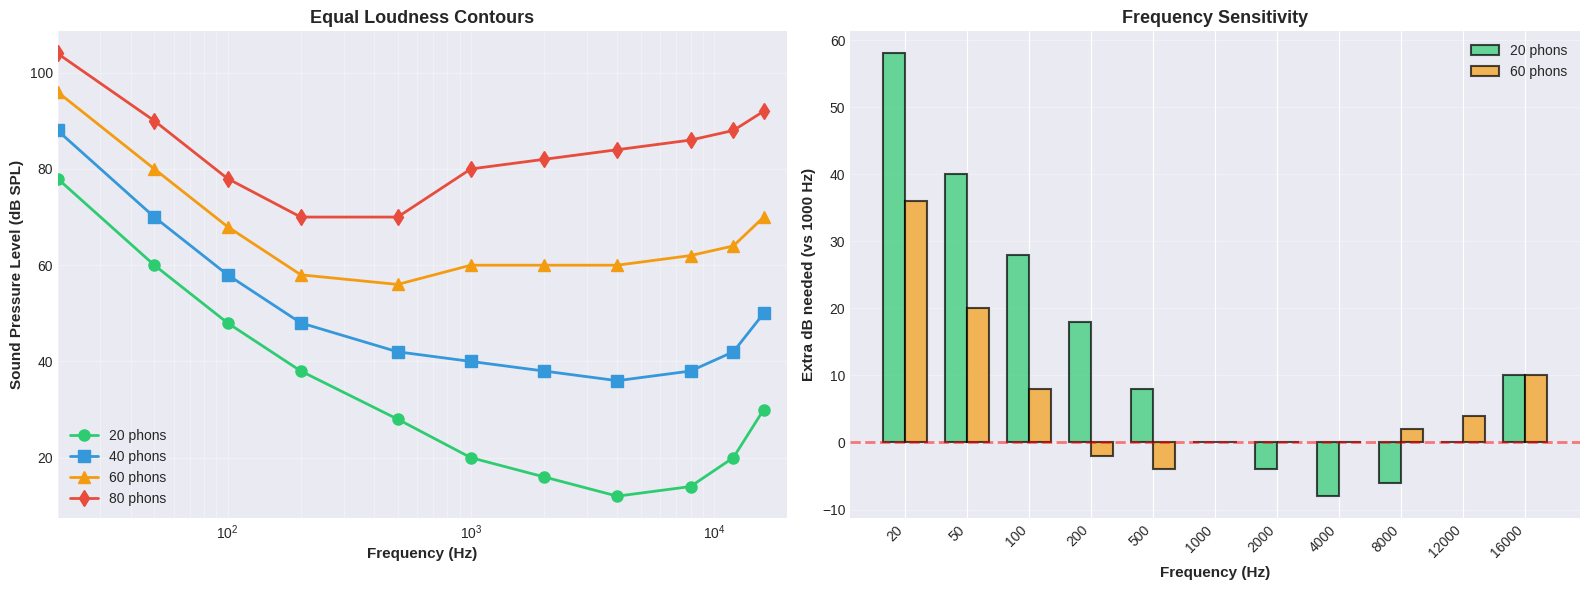


🎯 Key Insights:
  • Same dB at different frequencies ≠ same loudness
  • Low frequencies need much more power at low volumes
  • Most sensitive at 2-5 kHz (speech range)
  • Contours flatten at high levels


In [5]:
frequencies = np.array([20, 50, 100, 200, 500, 1000, 2000, 4000, 8000, 12000, 16000])

# Simplified equal loudness contours (ISO 226:2003 approximation)
phon_20 = np.array([78, 60, 48, 38, 28, 20, 16, 12, 14, 20, 30])
phon_40 = np.array([88, 70, 58, 48, 42, 40, 38, 36, 38, 42, 50])
phon_60 = np.array([96, 80, 68, 58, 56, 60, 60, 60, 62, 64, 70])
phon_80 = np.array([104, 90, 78, 70, 70, 80, 82, 84, 86, 88, 92])

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Equal loudness contours
axes[0].semilogx(frequencies, phon_20, 'o-', linewidth=2, markersize=8, label='20 phons', color='#2ECC71')
axes[0].semilogx(frequencies, phon_40, 's-', linewidth=2, markersize=8, label='40 phons', color='#3498DB')
axes[0].semilogx(frequencies, phon_60, '^-', linewidth=2, markersize=8, label='60 phons', color='#F39C12')
axes[0].semilogx(frequencies, phon_80, 'd-', linewidth=2, markersize=8, label='80 phons', color='#E74C3C')

axes[0].set_xlabel('Frequency (Hz)', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Sound Pressure Level (dB SPL)', fontsize=11, fontweight='bold')
axes[0].set_title('Equal Loudness Contours', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3, which='both')
axes[0].set_xlim(20, 20000)

# Frequency sensitivity
reference_freq_idx = 5  # 1000 Hz
extra_dB_20 = phon_20 - phon_20[reference_freq_idx]
extra_dB_60 = phon_60 - phon_60[reference_freq_idx]

x = np.arange(len(frequencies))
width = 0.35

axes[1].bar(x - width/2, extra_dB_20, width, label='20 phons', 
            color='#2ECC71', alpha=0.7, edgecolor='black', linewidth=1.5)
axes[1].bar(x + width/2, extra_dB_60, width, label='60 phons',
            color='#F39C12', alpha=0.7, edgecolor='black', linewidth=1.5)

axes[1].set_xlabel('Frequency (Hz)', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Extra dB needed (vs 1000 Hz)', fontsize=11, fontweight='bold')
axes[1].set_title('Frequency Sensitivity', fontsize=13, fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels(frequencies, rotation=45, ha='right')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2, alpha=0.5)

plt.tight_layout()
plt.show()

print("\n🎯 Key Insights:")
print("  • Same dB at different frequencies ≠ same loudness")
print("  • Low frequencies need much more power at low volumes")
print("  • Most sensitive at 2-5 kHz (speech range)")
print("  • Contours flatten at high levels")

---

## 📝 Summary

### Intensity (Objective)
- Physical measure: W/m²
- I ∝ A² (amplitude squared)
- Inverse square law with distance
- Measured in dB: L = 10 × log₁₀(I/I₀)

### Loudness (Subjective)
- Perceptual measure: phons
- Frequency-dependent (2-5 kHz most sensitive)
- Equal loudness contours show this relationship
- Critical for audio engineering and ML

### Practical Implications
1. **Audio Engineering**: Mix at moderate levels (~85 dB)
2. **Machine Learning**: Use perceptual features (Mel scale, A-weighting)
3. **Hearing Protection**: Limit exposure above 85 dB

---

**Next**: Part 2 covers **Timbre** (ADSR, harmonics, spectral content)